# Observations for the night September 08th 2021 : Use QuickLookExp


https://harvard.zoom.us/rec/play/N7umVF8Rk3vWvW_O3jkaTinofB2WxW3QKz0fVai_K-qvAYLt37uMrvskOlnBiMEjduSeQVzWT7_DDYzc.IY7Pqjef82YlWmZE?continueMode=true&_x_zm_rtaid=BjQYrDaETYeYRUMw8NQgLw.1613559822570.c813d210d38e378b719cb4048493df5b&_x_zm_rhtaid=205


- work with Weakly_2021_36
- use jupyter kernel LSST
- requires the installation see https://github.com/stubbslab/PCWG-AuxTel/blob/main/setup_script.md
- requires to write in file {HOME}/notebooks/.user_setups


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2021/09/09


In [146]:
#! eups list -s

In [147]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits

In [148]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("lsst.display.firefly")

In [149]:
# correct for bug in stack in wl_2021_02
# %config IPCompleter.use_jedi=False

In [150]:
FLAG_SAVE_IMAGE=True

In [151]:
!ls /project/shared/auxTel/rerun/mfl/slurmRun

calexp	icExp  postISRCCD	     repositoryCfg.yaml  spectractorOutput
config	icSrc  processStar_metadata  schema


In [152]:
!ls /project/shared/auxTel

CALIB	   CALIB-OLD	 CALIB-RHL  _parent	 ref_cats
CALIB_OLD  calibrations  Fossil     _parent.old  rerun


In [153]:
!ls /project/shared/auxTel/rerun/quickLook -l

total 71
drwxrwsrwx  4 49813 1363  4096 May 13 17:16 calexp
drwxrwsrwx  2 49813 1363  4096 Feb 21  2020 config
drwxrwsrwx  4 49813 1363  4096 May 13 17:16 icExp
drwxrwsrwx  7 49813 1363  4096 Jul  7 01:31 icSrc
drwxrwsrwx  4 49813 1363  4096 May 13 17:15 postISRCCD
drwxrwsrwx 68 49813 1363 32768 Sep  8 22:56 quickLookExp
-rwxrwxrwx  1 49813 1363   458 Feb 21  2020 repositoryCfg.yaml
-rwxrwxrwx  1 49813 1363   458 May 16 20:28 repositoryCfg.yaml_backup
drwxrwsrwx  4 49813 1363  4096 May 13 17:16 spectractorOutput


In [154]:
!ls /project/shared/auxTel/rerun/quickLook/quickLookExp/d2021-09-08 -l

total 85689472
-rw-r--r-- 1 49813 1363 108518400 Sep  8 23:16 quickLookExp-d2021-09-08-s00001.fits
-rw-r--r-- 1 49813 1363 108486720 Sep  8 23:16 quickLookExp-d2021-09-08-s00002.fits
-rw-r--r-- 1 49813 1363 108480960 Sep  8 23:16 quickLookExp-d2021-09-08-s00003.fits
-rw-r--r-- 1 49813 1363 108480960 Sep  8 23:15 quickLookExp-d2021-09-08-s00004.fits
-rw-r--r-- 1 49813 1363 108483840 Sep  8 23:15 quickLookExp-d2021-09-08-s00005.fits
-rw-r--r-- 1 49813 1363 108483840 Sep  8 23:15 quickLookExp-d2021-09-08-s00006.fits
-rw-r--r-- 1 49813 1363 108483840 Sep  8 23:15 quickLookExp-d2021-09-08-s00007.fits
-rw-r--r-- 1 49813 1363 108480960 Sep  8 23:15 quickLookExp-d2021-09-08-s00008.fits
-rw-r--r-- 1 49813 1363 108480960 Sep  8 23:15 quickLookExp-d2021-09-08-s00009.fits
-rw-r--r-- 1 49813 1363 108483840 Sep  8 23:14 quickLookExp-d2021-09-08-s00010.fits
-rw-r--r-- 1 49813 1363 108480960 Sep  8 23:14 quickLookExp-d2021-09-08-s00011.fits
-rw-r--r-- 1 49813 1363 108480960 Sep  8 23:14 quickLookExp-d

# Configuration

## Location and date

In [155]:
from lsst.rapid.analysis.nightReport import NightReporter
# data exist here
repoDir='/project/shared/auxTel/rerun/quickLook'
# recommended but wrong
#repoDir='project/shared/auxTel/rerun/mfl/slurmRun'
dayObs="2021-09-08"
reporter=NightReporter(repoDir,dayObs)

Loaded data for seqNums 1 to 829


# Selection

In [156]:
DISPERSER_SEL="holo4_003"

# Information from reporter

In [157]:
print(reporter.getObservedObjects())

['HD 129534', 'HD  21271', 'HD  21426', 'HD 207569', 'HD 223142', 'HD   6956', 'HD 009051', 'HD  24953', 'HD 154110', 'HD 214521', 'HD 135196', 'HD  22455', 'HD 218341', 'HD 199489', 'HD   9929', 'HD   3864', 'HD 274522', 'HD 194276', 'HD   3532', 'HD  15868', 'HD 157722', 'HD  39976', 'HD 126954', 'HD 216459', 'HD  19043', 'HD 214428', 'HD   1555', 'HD 209966', 'HD  22028', 'HD  14227A', 'HD   9930', 'HD 200889', 'HD   4680', 'slew_icrs', 'HD  19331', 'HD 185975', 'HD 140244', 'HD   8543', 'HD  15495', 'HD 213286', 'HD 14943', 'HD   3658', 'HD 210946', 'HD 225100', 'HD 126153', 'HD 143662', 'HD  18247', 'HD   4910', 'HD 219616', 'HD  29925', 'HD  38974', 'HD 212130', 'HD  21088', 'HD  26359', 'HD 218493', 'HD  33283', 'HD 150389', 'HD  11856']


In [158]:
#reporter.makePolarPlotForObjects()

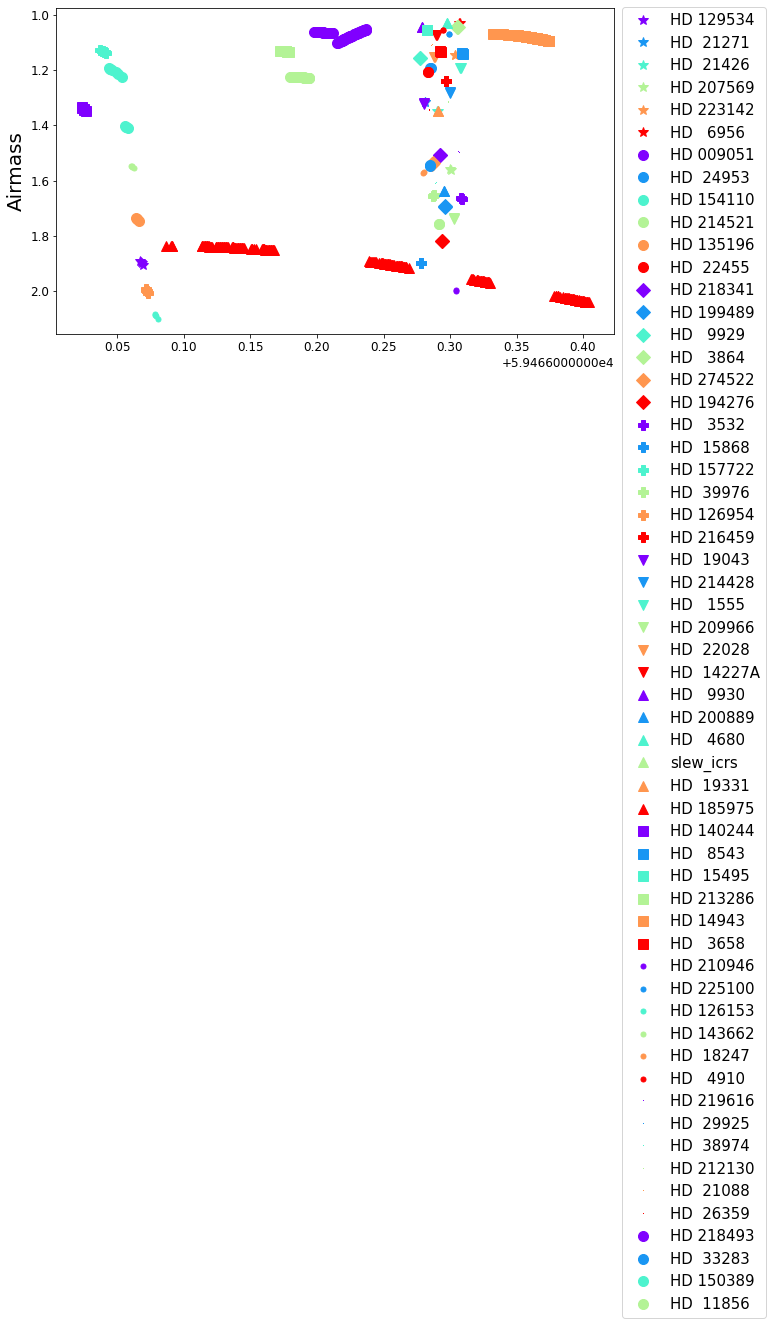

In [159]:
reporter.plotPerObjectAirMass()

In [160]:
reporter.printObsTable()

{seqNum} {imageType} {obj} {timeOfDay} {filt} {timeSinceLastExp} {expTime}
   1 bias      Park position 19:42:59.341 BG40~empty                   0.0  0.00
   2 bias      slew_icrs  20:10:49.008 BG40~empty                1669.7  0.00
   3 bias      slew_icrs  20:10:53.503 BG40~empty                   4.5  0.00
   4 bias      slew_icrs  20:10:57.988 BG40~empty                   4.5  0.00
   5 bias      slew_icrs  20:11:02.485 BG40~empty                   4.5  0.00
   6 bias      slew_icrs  20:11:06.972 BG40~empty                   4.5  0.00
   7 bias      slew_icrs  20:11:11.461 BG40~empty                   4.5  0.00
   8 bias      slew_icrs  20:11:15.951 BG40~empty                   4.5  0.00
   9 bias      slew_icrs  20:11:20.466 BG40~empty                   4.5  0.00
  10 bias      slew_icrs  20:11:24.956 BG40~empty                   4.5  0.00
  11 bias      slew_icrs  20:11:29.456 BG40~empty                   4.5  0.00
  12 bias      slew_icrs  20:11:33.952 BG40~empty               

# Butler

## Configuration for Butler

In [161]:
#butler=dafPersist.Butler("/project/shared/auxTel")
butler=dafPersist.Butler(repoDir)

## Sequence selection

- HD009051 : Series 1 : 410-433

- HD009051 : Series 2 : 458-481

- HD14943 : Series 3 : 663-692

In [162]:
# Series 1 : 
#all_myseq_holo=range(410,434)
# Series 2 : 
#all_myseq_holo=range(458,482)
# Series 3 : 
all_myseq_holo=range(663,693)
# 

all_myseq=all_myseq_holo

In [163]:
seqNum=all_myseq_holo[0]

In [164]:
seqNum

663

## Display

In [165]:
display1=afwDisplay.getDisplay(frame=1,port=80,name='sylviedc_debug_2021_09_08',url=os.environ["FIREFLY_URL"])

In [166]:
raw=butler.get('raw',dayObs=dayObs,seqNum=seqNum)

In [167]:
# and this command show the image
display1.mtv(raw)

In [168]:
display1.getClient().display_url()

## Access to image sequence

In [169]:
print(butler.queryMetadata('raw','seqNum',dayObs=dayObs))

[1, 2, 3, 5, 6, 7, 4, 13, 8, 9, 12, 11, 10, 19, 16, 15, 17, 18, 14, 21, 25, 22, 20, 24, 23, 26, 33, 28, 32, 27, 29, 31, 30, 37, 36, 38, 35, 34, 39, 40, 43, 42, 41, 44, 45, 48, 50, 46, 51, 49, 47, 52, 53, 55, 54, 56, 58, 57, 60, 59, 61, 62, 64, 66, 65, 63, 70, 69, 68, 71, 67, 72, 73, 74, 76, 77, 78, 79, 75, 83, 82, 80, 81, 84, 86, 85, 88, 87, 94, 92, 90, 91, 89, 93, 96, 97, 98, 99, 95, 103, 101, 100, 104, 102, 107, 108, 106, 109, 105, 113, 111, 112, 110, 116, 118, 115, 117, 114, 121, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

## Access to quickLookExp image

- assembled
- defect and bias corrected
- not unflatfielded


In [170]:
exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)

CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210908_000663: 'MJD-OBS not found'


In [171]:
exp_image=exp.image.array

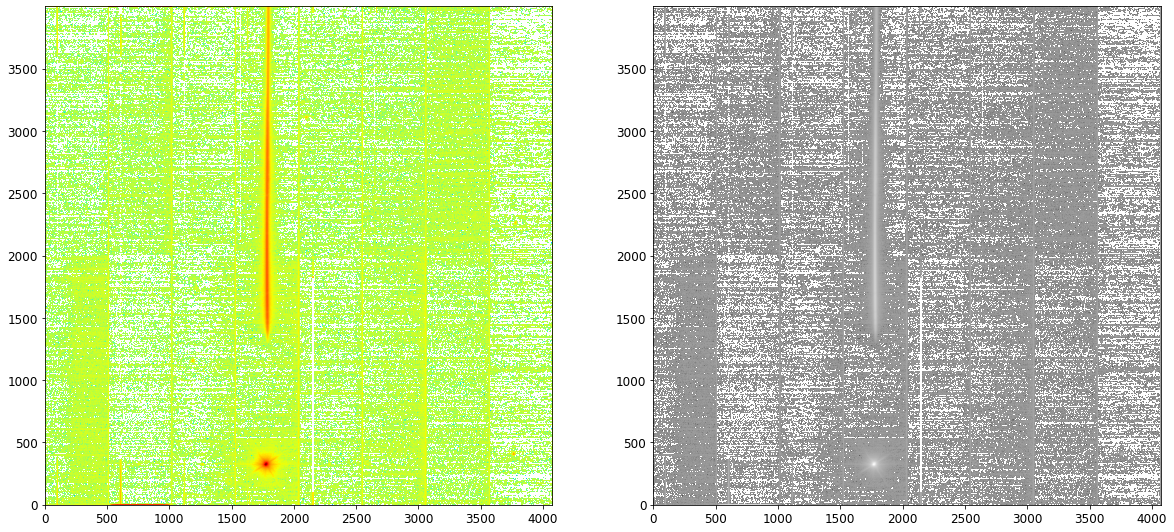

In [172]:
fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(121)
ax.imshow(exp_image,origin='lower',cmap="jet",norm=LogNorm())
ax=fig.add_subplot(122)
ax.imshow(exp_image,origin='lower',cmap="gray",norm=LogNorm())
plt.show()

In [173]:
type(exp_image)

numpy.ndarray

In [174]:
exp_image.shape

(4000, 4072)

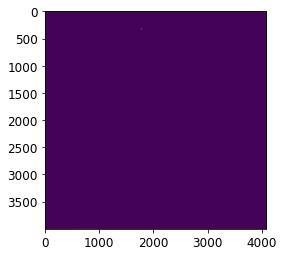

In [175]:
plt.imshow(exp_image)

## Meta Data

In [176]:
md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)

In [177]:
del md['DATASEC']
del md['COMMENT']
ha = md['HASTART']
del md['HASTART']
md['HA'] = ha

In [178]:
md.toDict()

{'SIMPLE': True,
 'EXTEND': True,
 'ORIGIN': 'LSST DM Header Service',
 'TIMESYS': 'TAI',
 'DATE': '2021-09-09T08:27:45.295',
 'DATE-OBS': '2021-09-09T08:28:19.035',
 'DATE-BEG': '2021-09-09T08:28:19.035',
 'DATE-END': '2021-09-09T08:28:19.668',
 'MJD': 59466.3526075777,
 'MJD-OBS': 59466.3529980879,
 'MJD-BEG': 59466.3529980879,
 'MJD-END': 59466.3530054186,
 'OBSID': 'AT_O_20210908_000663',
 'GROUPID': '2021-09-09T08:28:06.866',
 'IMGTYPE': 'OBJECT',
 'BUNIT': 'adu',
 'FACILITY': 'Vera C. Rubin Observatory',
 'TELESCOP': 'LSST AuxTelescope',
 'INSTRUME': 'LATISS',
 'OBSERVER': 'LSST',
 'OBS-LONG': -70.749417,
 'OBS-LAT': -30.244639,
 'OBS-ELEV': 2663.0,
 'OBSGEO-X': 1818938.94,
 'OBSGEO-Y': -5208470.95,
 'OBSGEO-Z': -3195172.08,
 'RA': 35.7278133333333,
 'DEC': -51.0921275,
 'RASTART': 35.7109982715835,
 'DECSTART': -51.1135178126238,
 'RAEND': 35.7109868071384,
 'DECEND': -51.1135401871144,
 'ROTPA': 132.730850293972,
 'ROTCOORD': 'sky',
 'ELSTART': 68.2870047374599,
 'AZSTART': -16

# Start

In [179]:
plt.rcParams["axes.labelsize"] = 'large'
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['xtick.labelsize']= 'large'
plt.rcParams['ytick.labelsize']= 'large'

In [180]:
all_my_exp_array=[]
all_my_header=[]
all_my_object=[]
all_my_seq=[]
all_my_grating=[]
all_my_filter=[]
all_my_date=[]


for seqNum in all_myseq:
    exp=butler.get('quickLookExp',dayObs=dayObs,seqNum=seqNum)
    md=butler.get("raw_md",dayObs=dayObs,seqNum=seqNum)
    
    header=md.toDict()
    
    #decode header
    
    obj_name=header['OBJECT']
    obj_name2 = ''.join(obj_name.split())
    grating=header['GRATING']
    obsid=header['OBSID']
    date=obsid.replace('AT_O_','') # remove pre-tag to get date only and seqnum
    filter_name=header['FILTER']
    filter_name2=filter_name.split("_")[0]   # cut empty_1 to empty
    
    # work on header to remove bad things for ds9
    del header['DATASEC']
    del header['COMMENT']
    ha = header['HASTART']
    del header['HASTART']
    header['HA'] = ha
        
    
    
    # select only pre-selected disperser
    if grating == DISPERSER_SEL: 
        all_my_exp_array.append(np.copy(exp.image.array))
        all_my_header.append(header)
        all_my_object.append(obj_name2)
        all_my_seq.append(header['SEQNUM'])
        all_my_grating.append(grating)
        all_my_filter.append(filter_name2)
        all_my_date.append(date)

CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210908_000663: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210908_000664: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210908_000665: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210908_000666: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210908_000667: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210908_000668: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210908_000669: 'MJD-OBS not found'
CRITICAL:astro_metadata_translator.headers:Ignoring translator header fixup of LATISS AT_O_20210908_0006

In [181]:
#idx=0
#for exp_img in all_my_exp_array:
#    print(idx,"......" ,exp_img.shape)
#    idx+=1

## Total number of images

In [182]:
NSEL=len(all_my_exp_array)

In [183]:
NSEL

30

# Plot

In [184]:
idx=0

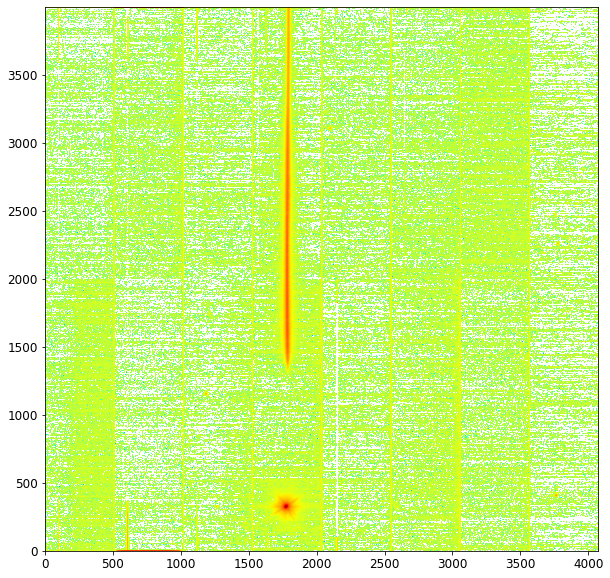

In [185]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.imshow(all_my_exp_array[idx],origin='lower',cmap="jet",norm=LogNorm())
plt.show()

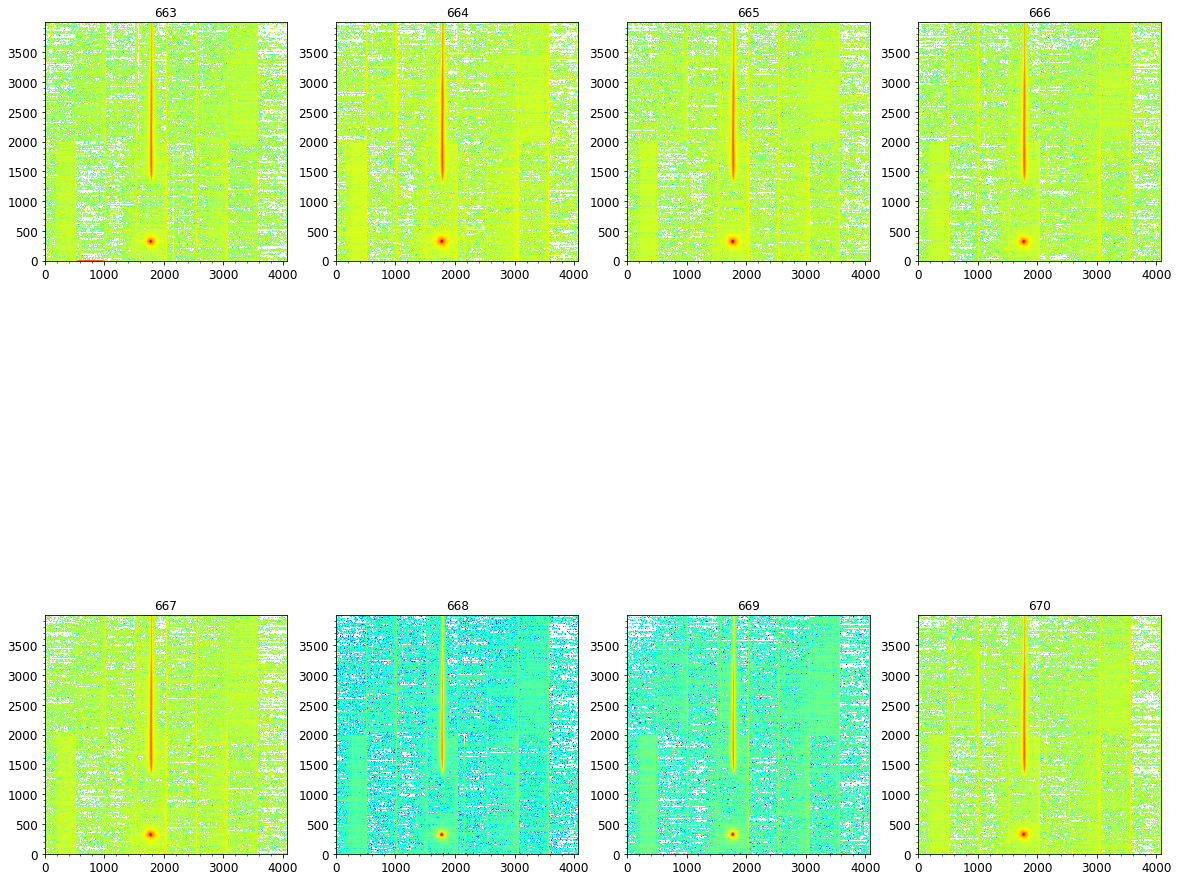

In [186]:

Ncol=4
Nrow=2
Ntot=Ncol*Nrow

fig = plt.figure(figsize=(20,20))

# loop on angle
for idx in np.arange(Ntot):
    if idx>=NSEL:
        break
        
    ax=fig.add_subplot(Nrow,Ncol,idx+1)
    ax.imshow(all_my_exp_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    ax.set_title(all_myseq[idx]) 
    ax.minorticks_on()
    ax.set_aspect("equal")
    
    #ax2=ax.twiny()
    #ax2.imshow(all_my_raw_array[idx],origin='lower',cmap="jet",norm=LogNorm())
    #ax2.set_xlim(ax.get_xlim())
    #ax2.minorticks_on()
    
    #ax.tick_params(which='major', length=10, width=2, direction='inout')
    #ax.tick_params(which='minor', length=5, width=2, direction='inout')
    #ax.grid(which='both')



    #ax.set_aspect('equal')

    #x1, x2 = ax.get_xlim() 
    #y1, y2 = ax.get_ylim() 
plt.show()

In [187]:
#all_my_raw_array=[]
#all_my_header=[]
#all_my_object=[]
#all_my_seq=[]
#all_my_grating=[]
#all_my_filter=[]


In [188]:
if FLAG_SAVE_IMAGE:
  
    for idx in np.arange(NSEL):
        filename=all_my_grating[idx]+"_"+all_my_filter[idx]+"_"+all_my_object[idx]+"_"+all_my_date[idx]+"_quickLookExp.fits"
        print(filename)
    
        hdr = fits.Header()
    
        for key,value in all_my_header[idx].items():
            hdr[str(key)]=value
        
        hdu = fits.PrimaryHDU(data=all_my_exp_array[idx],header=hdr)  # with headers
    
        hdul = fits.HDUList([hdu])
    
        hdul.writeto(filename,overwrite=True)
    
        

holo4_003_empty_HD14943_20210908_000663_quickLookExp.fits
holo4_003_empty_HD14943_20210908_000664_quickLookExp.fits
holo4_003_empty_HD14943_20210908_000665_quickLookExp.fits
holo4_003_empty_HD14943_20210908_000666_quickLookExp.fits
holo4_003_empty_HD14943_20210908_000667_quickLookExp.fits
holo4_003_empty_HD14943_20210908_000668_quickLookExp.fits
holo4_003_empty_HD14943_20210908_000669_quickLookExp.fits
holo4_003_empty_HD14943_20210908_000670_quickLookExp.fits
holo4_003_empty_HD14943_20210908_000671_quickLookExp.fits
holo4_003_empty_HD14943_20210908_000672_quickLookExp.fits
holo4_003_empty_HD14943_20210908_000673_quickLookExp.fits
holo4_003_empty_HD14943_20210908_000674_quickLookExp.fits
holo4_003_empty_HD14943_20210908_000675_quickLookExp.fits
holo4_003_empty_HD14943_20210908_000676_quickLookExp.fits
holo4_003_empty_HD14943_20210908_000677_quickLookExp.fits
holo4_003_empty_HD14943_20210908_000678_quickLookExp.fits
holo4_003_empty_HD14943_20210908_000679_quickLookExp.fits
holo4_003_empt